# **Introduction to Data Visualization using Python (Seaborn section)**
Full documentation in https://seaborn.pydata.org/

## ***A simple example***



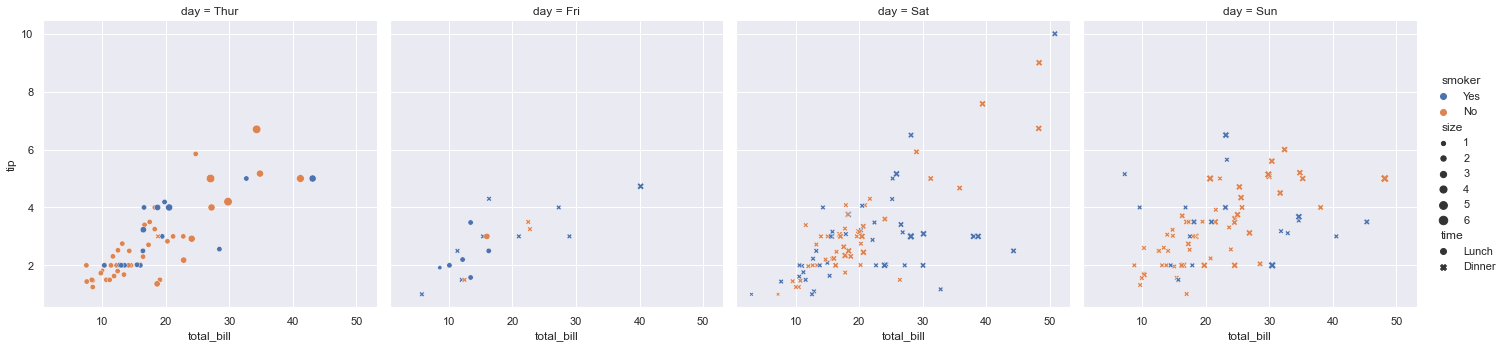

In [1]:
import seaborn as sns  # We import seaborn, which is the only library necessary for this simple example.

sns.set()               # We apply the default default seaborn theme, scaling, and color palette.

tips = sns.load_dataset("tips")    # We load one of the example datasets.

# print(tips)
# We draw a faceted scatter plot with multiple semantic variables.
sns.relplot(x="total_bill", y="tip", col="day",
            hue="smoker", style="time", size="size",
            data=tips);

In [ ]:
# We draw a faceted scatter plot with multiple semantic variables.
sns.scatterplot(x="total_bill", y="tip", #col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [ ]:
print(tips)

##**Timeseries plot with error bands**


In [ ]:
import seaborn as sns

sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

print(fmri)

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="event", style="event",
             data=fmri)

##**Specialized categorical plots**

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
tips = sns.load_dataset("tips")

# scatter
#sns.catplot(x="day", y="total_bill", hue="time",
#            kind="swarm", data=tips);

# violin
#sns.catplot(x="day", y="total_bill", hue="time",
#            kind="violin", split=True, data=tips);

# bar
sns.catplot(x="day", y="total_bill", hue="time",
            kind="bar", data=tips);

##**Scatterplot Matrix**

In [ ]:
import seaborn as sns
sns.set(style="ticks")
#sns.set_palette("Set1", n_colors=8, desat=.5)

df = sns.load_dataset("iris")
print(df)

In [ ]:
g = sns.pairplot(df, hue="species", diag_kind="hist", corner=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, levels=4, color=".2")

##**Grouped boxplots**

In [ ]:
import matplotlib.pyplot as plt

sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="time", y="total_bill",
            hue="day", palette=["g", "b", "r", "m"],
            data=tips)
sns.despine(offset=10, trim=True)

#place legend in upper right of plot
plt.legend(loc='upper center')

##**Plotting a diagonal correlation matrix**

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##**Plotting on a large number of facets**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])


print(df)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="P")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)